# Classify Fashion-MNIST using MLP


Credit: This notebook is adapted based on [Margaret Maynard-Reid's notebook](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb)



## Why Jupyter Notebook?


*   Interactive programming in the web browser
*   Great for visualization
*   Great for collabration
*   Popular tool for studying machine learning / deep learning




## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Notebook Overview


The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) data: 
60,000 train and 10,000 test data with 10 categories. Each gray-scale image is 28x28.

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale image is 28x28

>[Classify Fashion-MNIST](#scrollTo=r2NPAI4jZZgi)

>>[Why Jupyter Notebook?](#scrollTo=18xLQCydFHqi)

>>[Why Fashion-MNIST?](#scrollTo=XLMRPLVCFwEc)

>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)

>>[Congragulations!](#scrollTo=8AehWdRAVKN5)



## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets. 

In [0]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


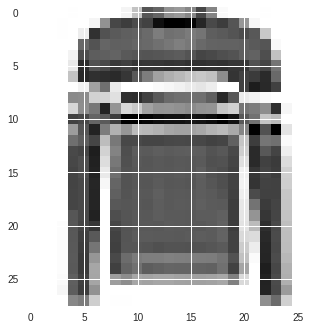

In [0]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:].astype(np.int), y_train[:5000].astype(np.int)

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w * h)
x_valid = x_valid.reshape(x_valid.shape[0], w * h)
x_test = x_test.reshape(x_test.shape[0], w * h)

# One-hot encode the labels
#y_train = tf.keras.utils.to_categorical(y_train, 10)
#y_valid = tf.keras.utils.to_categorical(y_valid, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)


# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 784) y_train shape: (55000,)
55000 train set
5000 validation set
10000 test set


# Create the Operations

To create the basic operations for implementing the MLP model.

In [0]:
class operation(object):
    """
    Operation abstraction
    """

    def forward(self, input):
        """Forward operation, reture output"""
        raise NotImplementedError

    def backward(self, out_grad, input):
        """Backward operation, return gradient to input"""
        raise NotImplementedError


class relu(operation):
    def __init__(self):
        super(relu, self).__init__()

    def forward(self, input):
        output = np.maximum(0, input)
        return output

    def backward(self, out_grad, input):
        #print(input.shape, out_grad.shape)
        in_grad = (input >= 0) * out_grad
        #print(in_grad.shape)
        return in_grad

      
class matmul(operation):
    def forward(self, input, weights):
        """
        # Arguments
            input: numpy array with shape (batch, in_features)
            weights: numpy array with shape (in_features, out_features)

        # Returns
            output: numpy array with shape(batch, out_features)
        """
        return np.matmul(input, weights)
    
    def backward(self, out_grad, input, weights):
        """
        # Arguments
            out_grad: gradient to the forward output of fc layer, with shape (batch, out_features)
            input: numpy array with shape (batch, in_features)
            weights: numpy array with shape (in_features, out_features)
            
        # Returns
            in_grad: gradient to the forward input with same shape as input
            w_grad: gradient to weights, with same shape as weights            
        """
        in_grad = np.matmul(out_grad, weights.T)
        w_grad = np.matmul(input.T, out_grad)
        return in_grad, w_grad
        
    
class add_bias(operation):
    def forward(self, input, bias):
        '''
        # Arugments
          input: numpy array with shape (batch, in_features)
          bias: numpy array with shape (in_features)

        # Returns
          output: numpy array with shape(batch, in_features)
        '''
        return input + bias.reshape(1, -1)
    
    
    def backward(self, out_grad, input, bias):
        """
        # Arguments
            out_grad: gradient to the forward output of fc layer, with shape (batch, out_features)
            input: numpy array with shape (batch, in_features)
            bias: numpy array with shape (out_features)
        # Returns
            in_grad: gradient to the forward input with same shape as input
            b_bias: gradient to bias, with same shape as bias
        """
        in_grad = out_grad
        b_grad = np.sum(out_grad, axis=0)
        return in_grad, b_grad
        
        
class softmax_cross_entropy(operation):
    
    def forward(self, input, labels):
        """
        # Arguments
            input: numpy array with shape (batch, num_class)
            labels: numpy array with shape (batch,)
            
        # Returns
            output: scalar, average loss
            probs: the probability of each category
        """
        # precision to avoid overflow
        eps = 1e-12

        batch = len(labels)
        input_shift = input - np.max(input, axis=1, keepdims=True)
        Z = np.sum(np.exp(input_shift), axis=1, keepdims=True)

        log_probs = input_shift - np.log(Z+eps)
        probs = np.exp(log_probs)
        output = -1 * np.sum(log_probs[np.arange(batch, dtype=np.int), labels]) / batch
        return output

    def backward(self, input, labels):
        """
        # Arguments
            input: numpy array with shape (batch, num_class)
            labels: numpy array with shape (batch,)
        # Returns
            in_grad: gradient to forward input of softmax cross entropy, with shape (batch, num_class)
        """
        # precision to avoid overflow
        eps = 1e-12

        batch = len(labels)
        input_shift = input - np.max(input, axis=1, keepdims=True)
        Z = np.sum(np.exp(input_shift), axis=1, keepdims=True)
        log_probs = input_shift - np.log(Z+eps)
        probs = np.exp(log_probs)

        in_grad = probs.copy()
        in_grad[np.arange(batch), labels] -= 1
        in_grad /= batch
        return in_grad

class SGD(object):
    '''For update the parameters based on gradient'''
    def __init__(self, alpha):
        self.alpha = alpha
       
        
    def update(self, p, g):
        '''
        Arguments
            p is the parameter numpy array
            g is the gradient numpy array
            
        Returns
            the updated parameter numpy array
        '''
        p -= self.alpha * g
        return p

# Simple model

## Construct the model graph

Create operator instances to construct the computation graph of the model

In [0]:
op1=matmul()
op2=add_bias()
op3=softmax_cross_entropy()
# initialize W and b

W= np.random.rand(x_train.shape[1], 10)/10
b= np.zeros(10)
    



##  Conduct training using mini-batch SGD with momentum

In [0]:

mW=np.zeros_like(W)
mb=np.zeros_like(b)

batchsize = 32
num_epoch = 10
alpha = 0.01
sgd = SGD(alpha)

for epoch in range(num_epoch):
    loss = 0
    for i in range(y_train.shape[0] // batchsize):
        x = x_train[i*batchsize: i*batchsize + batchsize]
        y = y_train[i*batchsize: i*batchsize + batchsize]
        z1 = op1.forward(x, W)
        z2 = op2.forward(z1, b)
        loss += op3.forward(z2, y)
        
        dz2 = op3.backward(z2, y)
        dz1, db = op2.backward(dz2, z1, b)
        dx, dW = op1.backward(dz1, x, W)
        #W = sgd.update(W, dW)
        #b = sgd.update(b, db)
        
        
        mW = 0.9 * mW + dW
        mb = 0.9 * mb + db
        W = W - alpha * mW
        b = b - alpha * mb
        
        
    print('loss at epoch {} is {}'.format(epoch, loss / (i+1)))



loss at epoch 0 is 0.5726926033155759
loss at epoch 1 is 0.46860742037680103
loss at epoch 2 is 0.44829310830358715
loss at epoch 3 is 0.43711969246589066
loss at epoch 4 is 0.429582048904328
loss at epoch 5 is 0.423966470719737
loss at epoch 6 is 0.4195310671500469
loss at epoch 7 is 0.4158897574082135
loss at epoch 8 is 0.4128167299331042
loss at epoch 9 is 0.41016892839714947


## Test Accuracy

In [0]:
z=op1.forward(x_test, W)
z=op2.forward(z, b)
predict = np.argmax(z, axis=1)
ncorrect = np.sum(predict ==  y_test)

# Print test accuracy
print('\n', 'Test accuracy:', ncorrect / y_test.shape[0])


 Test accuracy: 0.8332


## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

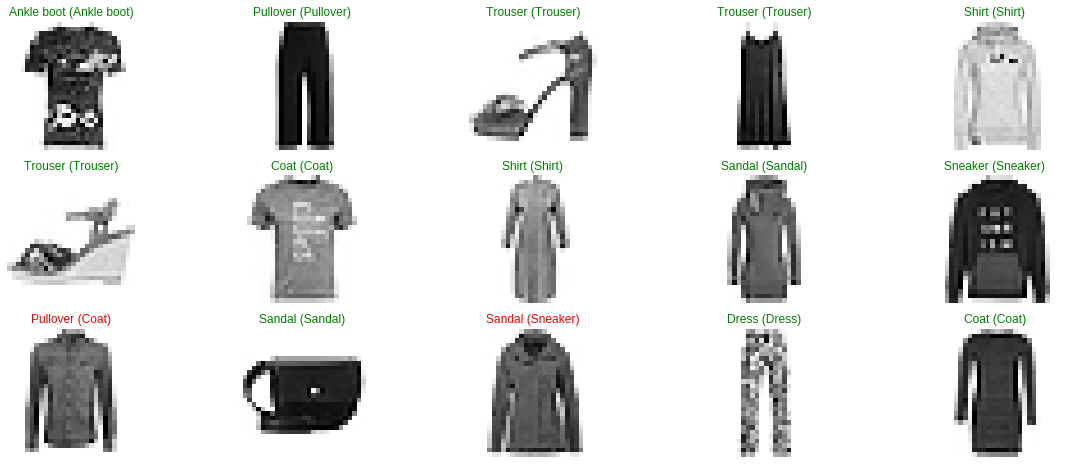

In [0]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]).reshape(w, h))
    predict_index = predict[i]
    true_index = y_test[i]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Complex model

In [0]:
class Layer(object):
    """
    Layer abstraction
    """

    def __init__(self, name):
        """Initialization"""
        self.name = name
        self.training = True  # The phrase, if for training then true
        self.trainable = False  # Whether there are parameters in this layer that can be trained

    def forward(self, input):
        """Forward pass, reture output"""
        raise NotImplementedError

    def backward(self, out_grad, input):
        """Backward pass, return gradient to input"""
        raise NotImplementedError

    def update(self, optimizer):
        """Update parameters in this layer"""
        pass

    def set_mode(self, training):
        """Set the phrase/mode into training (True) or tesing (False)"""
        self.training = training

    def set_trainable(self, trainable):
        """Set the layer can be trainable (True) or not (False)"""
        self.trainable = trainable

    def get_params(self, prefix):
        """Reture parameters and gradient of this layer"""
        return None


class FCLayer(Layer):
    def __init__(self, in_features, out_features, name='fclayer'):
        """Initialization
        # Arguments
            in_features: int, the number of input features
            out_features: int, the numbet of required output features
            initializer: Initializer class, to initialize weights
        """
        super(FCLayer, self).__init__(name=name)
        self.matmul = matmul()
        self.addbias = add_bias()

        self.trainable = True

        self.weights = np.random.rand(in_features, out_features) *0.01
        self.bias = np.zeros(out_features)

        self.w_grad = np.zeros(self.weights.shape)
        self.b_grad = np.zeros(self.bias.shape)

    def forward(self, input):
        out = self.matmul.forward(input, self.weights)
        return self.addbias.forward(out, self.bias)

    def backward(self, out_grad, input):
        g, self.b_grad = self.addbias.backward(out_grad, None, self.bias)
        in_grad, self.w_gad=self.matmul.backward(g, input, self.weights)
        return in_grad

    def update(self, params):
        """Update parameters (self.weights and self.bias) with new params
        # Arguments
            params: dictionary, one key contains 'weights' and the other contains 'bias'
        # Returns
            none
        """
        for k, v in params.items():
            if 'weights' in k:
                self.weights = v
            else:
                self.bias = v

    def get_params(self, prefix):
        """Return parameters (self.weights and self.bias) as well as gradient (self.w_grad and self.b_grad)
        # Arguments
            prefix: string, to contruct prefix of keys in the dictionary (usually is the layer-ith)
        # Returns
            params: dictionary, store parameters of this layer, one key contains 'weights' and the other contains 'bias'
            grads: dictionary, store gradient of this layer, one key contains 'weights' and the other contains 'bias'
            None: if not trainable
        """
        if self.trainable:
            params = {
                prefix+':'+self.name+'/weights': self.weights,
                prefix+':'+self.name+'/bias': self.bias
            }
            grads = {
                prefix+':'+self.name+'/weights': self.w_grad,
                prefix+':'+self.name+'/bias': self.b_grad
            }
            return params, grads
        else:
            return None
        

In [0]:
def get_params(layers):
    params = {}
    grads = {}
    for l, layer in enumerate(layers):
        if layer.trainable:
            layer_params, layer_grads = layer.get_params('layer-%dth' % l)
            params.update(layer_params)
            grads.update(layer_grads)
    return params, grads

def update(layers, optimizer):
    params, grads = get_params(layers)

    # clip gradients
    # for k, v in grads.items():
    #     grads[k] = clip_gradients(v)
    #     print(k, np.mean(np.abs(v)))
    
    new_params = {}
    for k in list(params.keys()):
        new_params[k] = optimizer.update(params[k], grads[k])

    for l, layer in enumerate(layers):
        if layer.trainable:
            w_key = 'layer-%dth:' % l + layer.name + '/weights'
            b_key = 'layer-%dth:' % l + layer.name + '/bias'
            layer_params = {
                w_key: new_params[w_key],
                b_key: new_params[b_key]
            }
        layer.update(layer_params)
        
        

            


In [0]:
model = []
model.append(FCLayer(w*h, 32))
model.append(relu())
model.append(FCLayer(32, 32))
model.append(relu())
model.append(FCLayer(32, 16))

layers = [x for x in model if isinstance(x, Layer)]

loss_op = softmax_cross_entropy()

sgd = SGD(0.01)
batchsize = 64
num_epoch = 5

for epoch in range(num_epoch):
    loss = 0
    nbatch = y_train.shape[0] // batchsize
    for i in range(nbatch):
        x = x_train[i*batchsize: i*batchsize + batchsize]
        y = y_train[i*batchsize: i*batchsize + batchsize]
        outputs = []
       
        for l, node in enumerate(model):
            outputs.append(x)
            x = node.forward(x)
        loss += loss_op.forward(x, y)
        grads = loss_op.backward(x, y)
        for l, node in enumerate(model[::-1]):
            grads = node.backward(grads, outputs[-1-l])
        update(layers, sgd)
        
    print('loss at epoch {} is {}'.format(epoch, loss / (nbatch)))

loss at epoch 0 is 2.6542895723453896
loss at epoch 1 is 2.519425920433939
loss at epoch 2 is 2.455539307517287
loss at epoch 3 is 2.4195412457043277
loss at epoch 4 is 2.3967882075079756


# Training over the computation graph (optional)

In [0]:
class node(object):
    def __init__(self, op, src, dst):
        '''
        A node in the computation graph which does the transformation of data 
        indexed by src and the result is put into the data indexed by dst.
        
        Arguments
        op: an operation instance
        src: a list for the index of the input data. All intermediate data is 
            stored in a global list.
        dst: the index for the output data
        '''
        self.op = op
        self.src = src
        self.dst = dst
        
def sublist(inlist, idx):
    '''return a sublist from the inlist'''
    if type(idx) is list:
        return [inlist[i] for i in idx]
    else:
        return [inlist[idx]]
        
def bp(model, values):
    '''run backpropagation.
    
    Arguments
        model: a list of operations
        values: a list storing all data (tensor, matrix, vector or scalar)
    
    Returns
        the gradient of the data in values
        values
    '''
    grads = [None] * len(values)
    for nd in model:
        values[nd.dst] = nd.op.forward(*sublist(values, nd.src))
    loss_nd = model[-1]
    grads[loss_nd.src[0]]=loss_nd.op.backward(*sublist(values, loss_nd.src))
    for nd in model[::-1][1:]:        
        g = nd.op.backward(grads[nd.dst], *sublist(values, nd.src))
        if type(g) is not tuple:
            g = [g]
        
        for i, src in enumerate(nd.src):
            grads[src] = g[i]
            #print(values[src].shape, grads[src].shape)

        
    return grads, values

In [0]:
batchsize = 64
num_epoch = 5
alpha = 0.01

values = []
nodes = []
param_idx = []

# add matmul operation whose inputs are from values[0] and values[1]; 
# the output will be put into values[3]
nodes.append(node(matmul(), [1, 2], 3))
values.append(None)
param_idx.append(len(values))
# values[1] is the weight matrix
values.append(np.random.rand(x_train.shape[1], 32)*0.01)


# add_bias operation, whose inputs are from values[2] and values[3];
# the output will be put into values[4]
nodes.append(node(add_bias(), [2, 3], 4))
values.append(None)
param_idx.append(len(values))
values.append(np.zeros(32))

nodes.append(node(relu(), [4], 5))
values.append(None)



nodes.append(node(matmul(), [5, 6], 7))
values.append(None)
param_idx.append(len(values))
values.append(np.random.rand(32, 10))


nodes.append(node(add_bias(), [7, 8], 9))
values.append(None)
param_idx.append(len(values))
values.append(np.zeros(10))

nodes.append(node(softmax_cross_entropy(), [9, 10], 11))
values.append(None)
values.append(None)

values.append(None) # for label


for epoch in range(num_epoch):
    loss = 0
    for i in range(y_train.shape[0] // batchsize):
        x = x_train[i*batchsize: i*batchsize + batchsize]
        y = y_train[i*batchsize: i*batchsize + batchsize]
        values[0] = x
        values[-2] = y 
        grads, values = bp(nodes, values) 
        loss += values[-1]
        
        for idx in param_idx:
            
            values[idx] -=  alpha*grads[idx]
            
        #if i %500 == 0:
    print('loss at iteration {} is {}'.format(i, loss / (i+1)))


loss at iteration 858 is 225.7137280826951
loss at iteration 858 is 8.565460415282411
loss at iteration 858 is 4.307414661041713
loss at iteration 858 is 2.758597569880868
loss at iteration 858 is 1.9879508106484098
